# **Stress Levels Prediction in Sleep Patterns with multiple Classification Models**

# **Importing Libraries**

In [49]:
# Import necessary libraries
import pandas as pd                    # For data manipulation and analysis using DataFrames
import numpy as np                     # For numerical operations
import matplotlib.pyplot as plt        # For creating visualizations
import seaborn as sns                  # For advanced visualizations and statistical graphics
from sklearn.model_selection import train_test_split    # For splitting data into training and testing sets
from sklearn.metrics import confusion_matrix            # Import the confusion_matrix function for evaluating classification results
from sklearn.metrics import classification_report       # Import the classification_report function for detailed classification metrics

from sklearn.ensemble import RandomForestClassifier    # For Random Forest model
from sklearn.tree import DecisionTreeClassifier        # For Decision Tree model
from sklearn.svm import SVC                            # For Support Vector Machine (SVM) model
from sklearn.naive_bayes import GaussianNB            # For Gaussian Naive Bayes model
from sklearn.neighbors import KNeighborsClassifier    # For k-Nearest Neighbors (k-NN) model

# **Importing Our Dataset**

In [50]:
# Reading the CSV file 'SaYoPillow.csv' and storing the data in a DataFrame called 'data'
data = pd.read_csv("SaYoPillow.csv")

# Displaying the first 5 rows of the dataset
data.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [51]:
# Displaying the last 5 rows of the dataset
data.tail()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1
629,73.920,21.392,93.392,11.392,91.392,91.96,4.088,63.48,2


### **About the dataset**
In SayoPillow.csv, you will see the relationship between the parameters- snoring range of the user, respiration rate, body temperature, limb movement rate, blood oxygen levels, eye movement, number of hours of sleep, heart rate and Stress Levels (0- low/normal, 1 – medium low, 2- medium, 3-medium high, 4 -high)

# **Understanding our data**

In [52]:
# Shape of our data
print("Rows and Columns of the dataset :- ",data.shape)

Rows and Columns of the dataset :-  (630, 9)


In [53]:
# Identifying information about composition and potential data quality
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [54]:
# Displaying the columns in our dataset
data.columns

Index(['sr', 'rr', 't', 'lm', 'bo', 'rem', 'sr.1', 'hr', 'sl'], dtype='object')

### **Columns Description**

Column Descriptions:

- 'sr' or 'snoring_rate': The rate or intensity of snoring during sleep, which could be measured in some unit or scale.
- 'rr' or 'respiration_rate': The number of breaths taken per minute during sleep.
- 't' or 'body_temperature': The body temperature of the user during sleep, possibly measured in degrees Celsius or Fahrenheit.
- 'lm' or 'limb_movement': The rate or intensity of limb movement during sleep, indicating how active or restless the person is.
- 'bo' or 'blood_oxygen': The blood oxygen level, which represents the amount of oxygen present in the blood during sleep.
- 'rem' or 'eye_movement': The eye movement activity during sleep, which might indicate the Rapid Eye Movement (REM) phase of sleep.
- 'sr.1' or 'sleeping_hours': The number of hours slept during a particular sleep session.
- 'hr' or 'heart_rate': The number of heartbeats per minute during sleep, an essential physiological parameter related to overall health and sleep quality.
- 'sl' or 'stress_level': The target variable representing the stress level during sleep, categorized into 

In [55]:
# Renaming the columns of the DataFrame for better readability and understanding
data.columns=['snoring_rate', 'respiration_rate', 'body_temperature', 'limb_movement', 'blood_oxygen', \
             'eye_movement', 'sleeping_hours', 'heart_rate', 'stress_level']
data.head()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate,stress_level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [56]:
# To show statistical summary of the columns of our data
data.describe(include="all")

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate,stress_level
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


# **Checking Null Values**

In [57]:
#checking for null values in the dataframe
data.isnull().sum()

snoring_rate        0
respiration_rate    0
body_temperature    0
limb_movement       0
blood_oxygen        0
eye_movement        0
sleeping_hours      0
heart_rate          0
stress_level        0
dtype: int64

### **Inference**
The output of the line data.isnull().sum() indicates that there are no missing values in any of the columns of the dataset. Each column has a count of 0 for missing values.

Having no missing values in the dataset is a positive aspect as it simplifies the data preprocessing step. Missing data can cause challenges during analysis and model building, but in this case, we have a complete dataset, allowing us to proceed directly to the subsequent steps of data exploration, visualization, feature selection, model training, and evaluation.

# **Checking distribution of Target Variable**

In [58]:
# To display number of samples on each class
data['stress_level'].value_counts()

0    126
1    126
2    126
3    126
4    126
Name: stress_level, dtype: int64

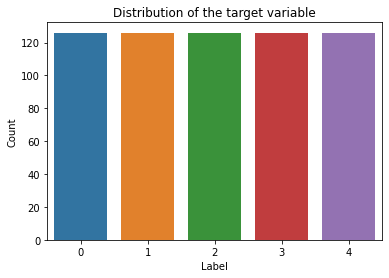

In [59]:
# Creating a count plot to visualize the distribution of the target variable 'stress_level'
# using the countplot() function from the seaborn library
# The 'stress_level' column from the DataFrame 'data' is specified as the x-axis variable
sns.countplot(x='stress_level', data=data)

# Setting the label for the x-axis
plt.xlabel('Label')

# Setting the label for the y-axis
plt.ylabel('Count')

# Setting the title of the plot
plt.title('Distribution of the target variable')

# Displaying the plot
plt.show()

# **Exploratory Data Analysis**

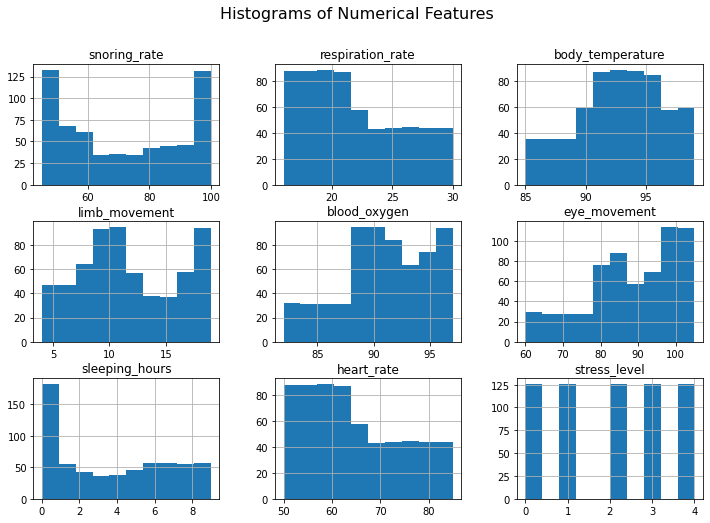

In [60]:
# Histograms for each numerical feature
data.hist(figsize=(12, 8))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

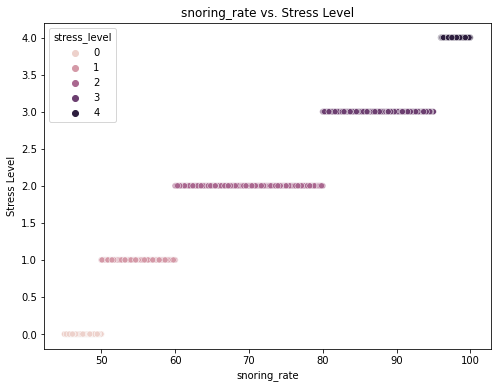

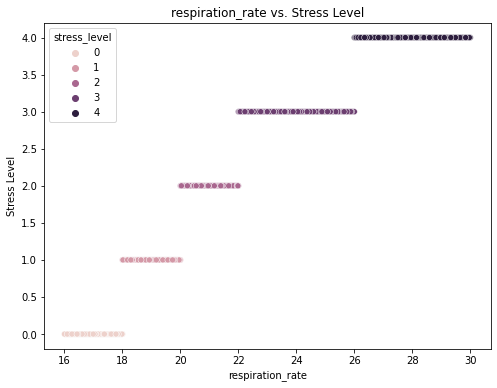

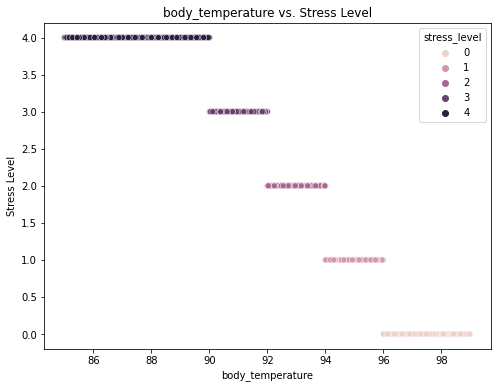

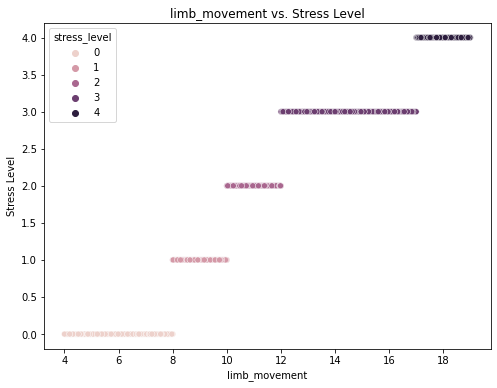

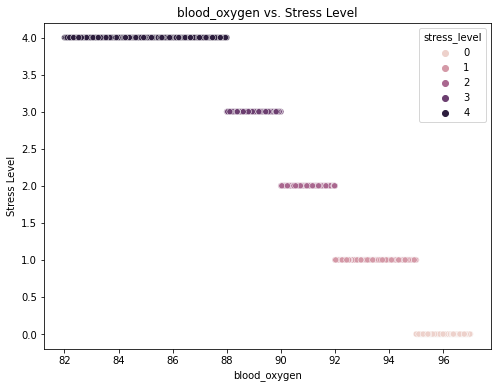

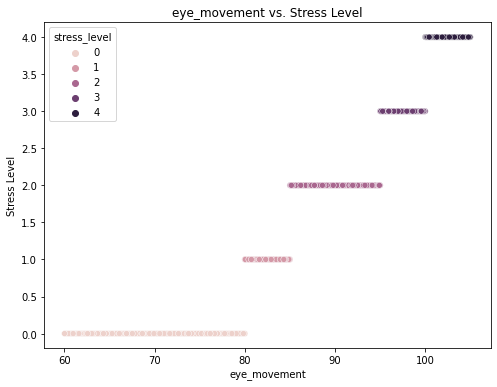

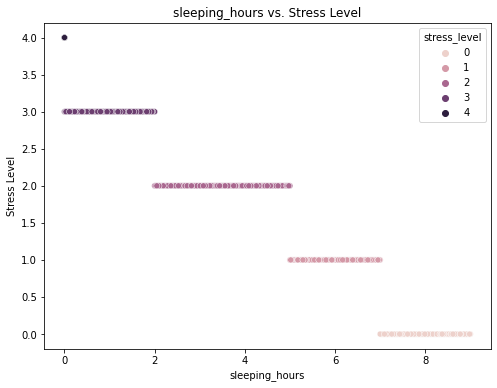

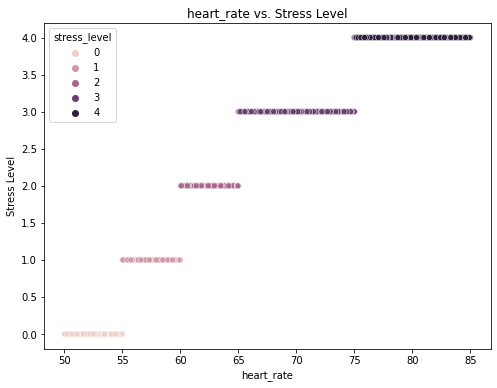

In [61]:
# Scatter plots for each numerical feature against 'stress_level'
for feature in data.columns[:-1]:  # Exclude the target variable 'stress_level'
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=feature, y='stress_level', hue='stress_level')
    plt.title(f"{feature} vs. Stress Level")
    plt.xlabel(feature)
    plt.ylabel("Stress Level")
    plt.show()

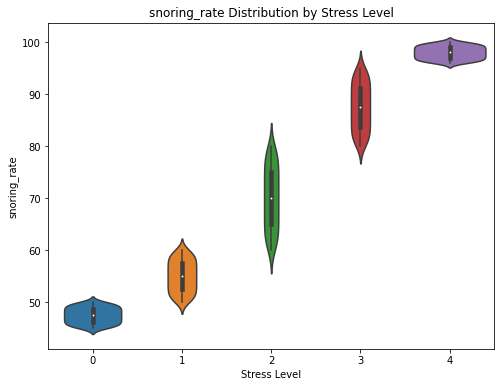

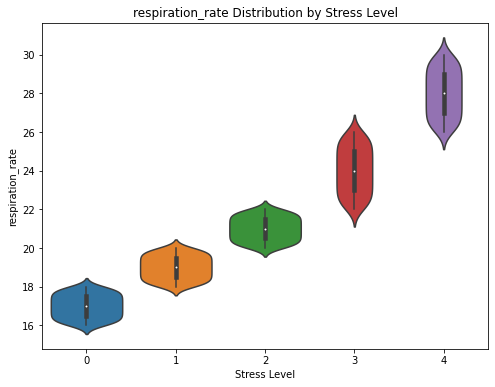

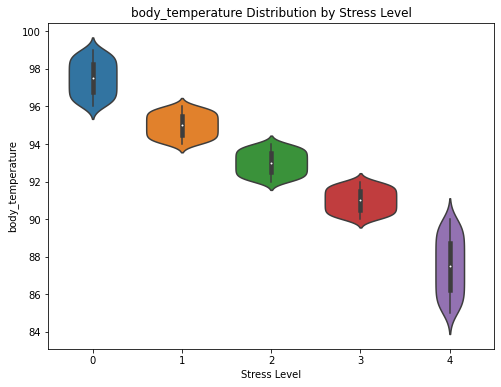

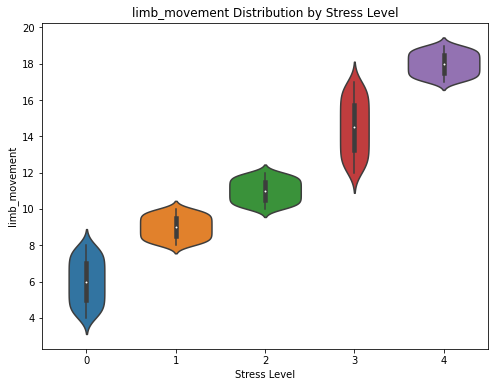

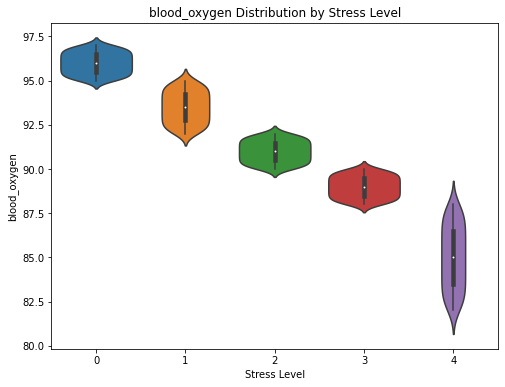

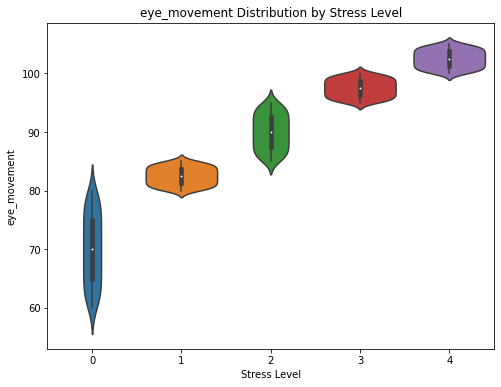

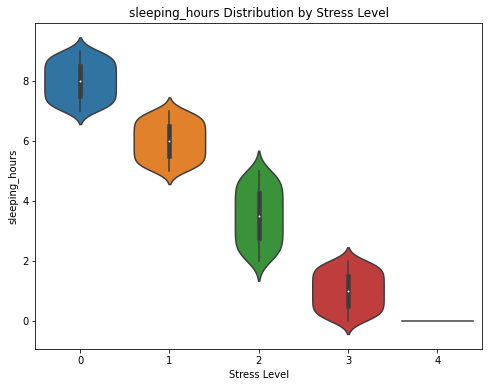

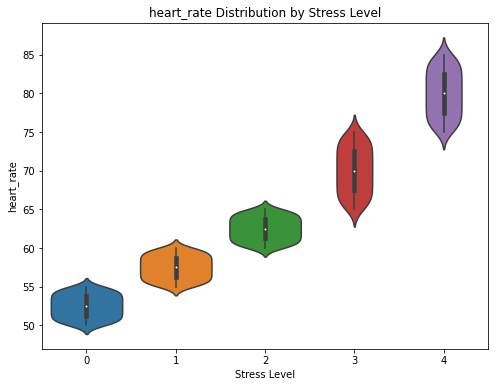

In [62]:
# Violin plots for numerical features based on 'stress_level'
for feature in data.columns[:-1]:  # Exclude the target variable 'stress_level'
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=data, x='stress_level', y=feature)
    plt.title(f"{feature} Distribution by Stress Level")
    plt.xlabel("Stress Level")
    plt.ylabel(feature)
    plt.show()

c:\Users\Vikas Jadaun\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


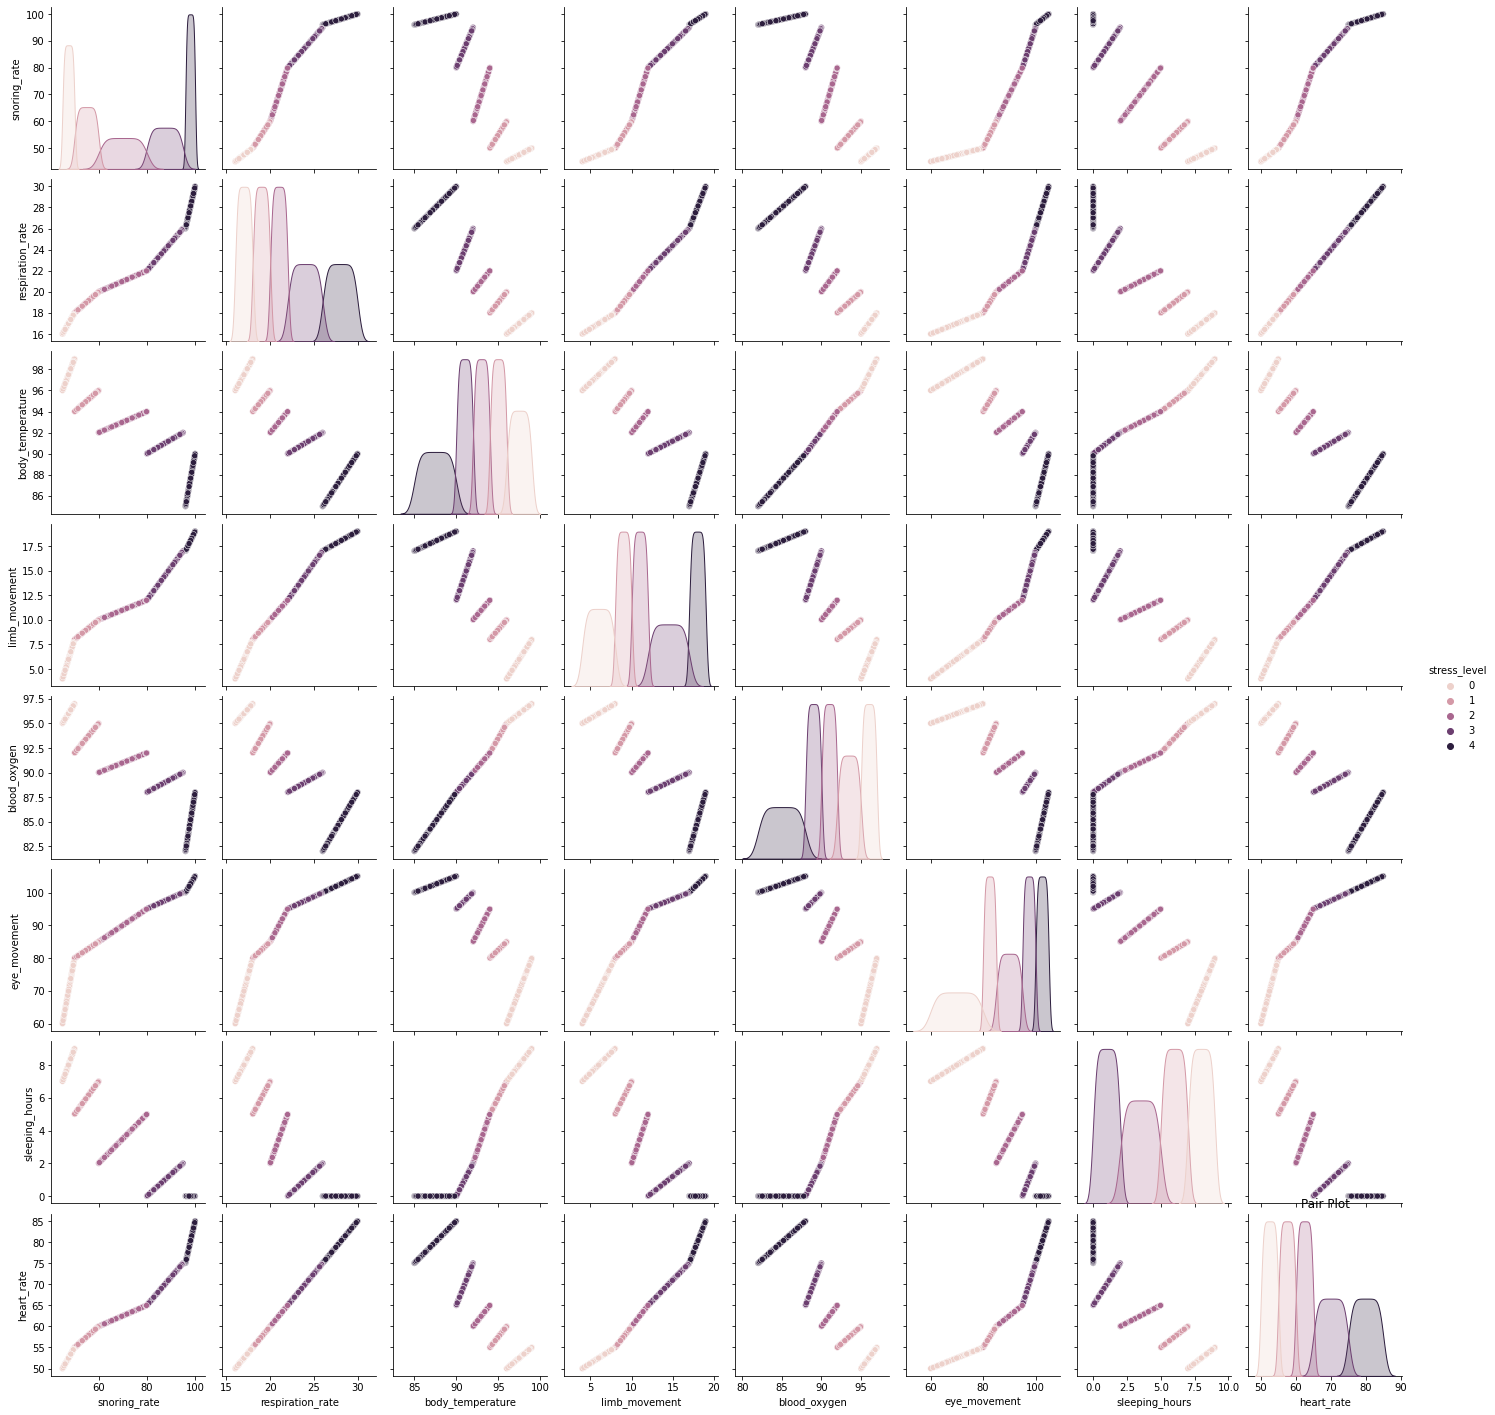

In [63]:
# Creating a pair plot to visualize pairwise relationships between variables, with 'stress_level' as the hue
sns.pairplot(data, hue='stress_level')

# Adding a title to the plot
plt.title('Pair Plot')

# Display the pair plot
plt.show()

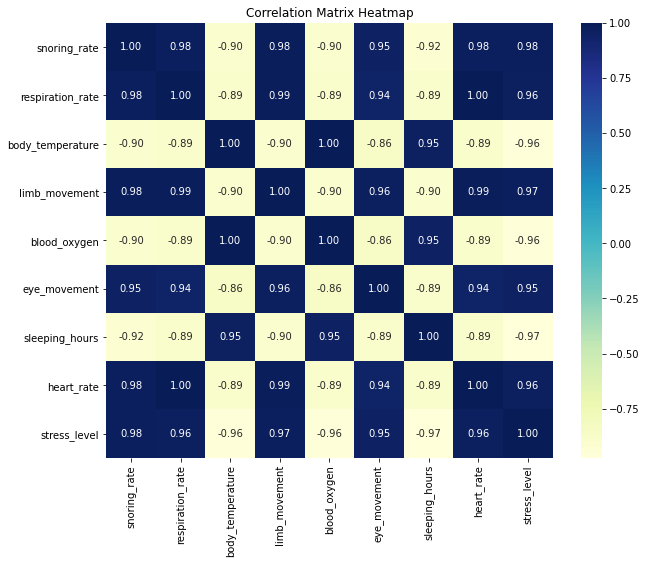

In [64]:
# Correlation Analysis: Correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

# **Splitting our Dataset**

In [65]:
# Split the data into features (X) and the target variable (y)
X = data.drop(['stress_level'], axis=1)
y = data['stress_level']

In [66]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (504, 8)
y_train shape: (504,)
X_test shape: (126, 8)
y_test shape: (126,)


# **Identifying Important features**

In [67]:
# Create an instance of the RandomForestClassifier with hyperparameters
forest = RandomForestClassifier(n_estimators=500, random_state=1)

# Train the RandomForestClassifier on the training data
forest.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=500, random_state=1)

In [68]:
# Get the feature importances from the trained RandomForestClassifier
importances = forest.feature_importances_

# Loop over each feature and its importance
for i in range(X_train.shape[1]):
    # Print the feature number, name, and importance score
    print("%2d) %-*s %f" % (i + 1, 30, data.columns[i], importances[i]))

 1) snoring_rate                   0.130143
 2) respiration_rate               0.123295
 3) body_temperature               0.122216
 4) limb_movement                  0.123938
 5) blood_oxygen                   0.136199
 6) eye_movement                   0.137116
 7) sleeping_hours                 0.104807
 8) heart_rate                     0.122288


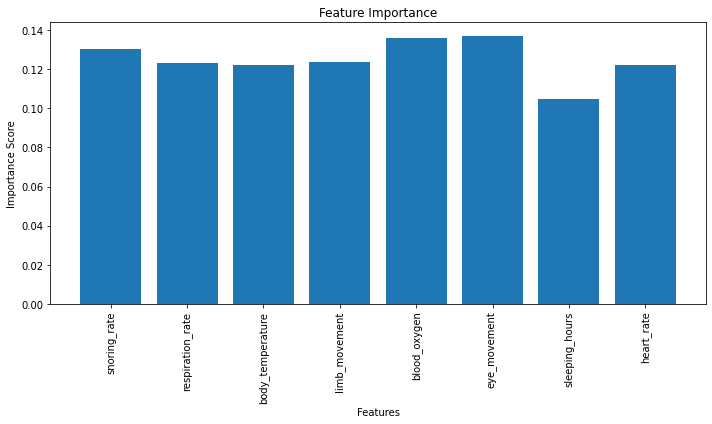

In [69]:
# Plotting the feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.title('Feature Importance')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

### **Inference:**


- The model considers 'eye_movement' and 'blood_oxygen' as the most critical features for stress level prediction during sleep. High values of these features may indicate higher stress levels.

- 'snoring_rate', 'limb_movement', and 'heart_rate' also have notable importance, indicating their relevance to stress prediction.

- On the other hand, 'sleeping_hours' seems to be the least influential feature according to this model, although it is still essential to consider it in the analysis.

# **Model Training**

### **1. Logistic Regression Classifier**

In [70]:
# Creating a logistic regression classifier object with specified parameters
# using the LogisticRegression class from scikit-learn
# The max_iter parameter is set to 1000, which determines the maximum number of iterations for convergence
# The C parameter is set to 0.1, which controls the regularization strength (inverse of the regularization parameter)
log_reg = LogisticRegression(max_iter=1000, C=0.1)

# Training the logistic regression classifier using the training data
# The fit() method is called on the logistic regression object, specifying X_train and y_train as the training data
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000)

In [71]:
# Calculating the accuracy score of the logistic regression model on the test dataset
# using the score() method of the logistic regression object
# The X_test and y_test parameters are provided as the test data
log_reg.score(X_test, y_test)

1.0

In [72]:
# Using the trained logistic regression model to predict the labels for the test dataset
# using the predict() method of the logistic regression object
# The X_test parameter is provided as the test data
# The predicted labels are assigned to the variable y_predict
y_predict = log_reg.predict(X_test)

# Calculate the confusion matrix to evaluate the performance of the model
# using the confusion_matrix() function from scikit-learn
# The true labels (y_test) and predicted labels (y_predict) are provided as the parameters
matrix = confusion_matrix(y_test, y_predict)

print("Confusion Matrix:")
print(matrix)

Confusion Matrix:
[[23  0  0  0  0]
 [ 0 24  0  0  0]
 [ 0  0 28  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 25]]


In [73]:
# To Print the classification report to evaluate the performance of the model
# using the classification_report() function from scikit-learn
# The true labels (y_test) and predicted labels (y_predict) are provided as the parameters
report = classification_report(y_test, y_predict)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



### **2. Decision Tree Classifier**

In [74]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [75]:
decision_tree.score(X_test,y_test)

0.9841269841269841

In [76]:
y_predict = decision_tree.predict(X_test)

matrix = confusion_matrix(y_test, y_predict)

print("Confusion Matrix:")
print(matrix)

Confusion Matrix:
[[23  0  0  0  0]
 [ 1 23  0  0  0]
 [ 0  0 28  0  0]
 [ 0  0  0 25  1]
 [ 0  0  0  0 25]]


In [77]:
report = classification_report(y_test, y_predict)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.96      0.98        24
           2       1.00      1.00      1.00        28
           3       1.00      0.96      0.98        26
           4       0.96      1.00      0.98        25

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126



### **3. Random Forest Classifier**

In [78]:
random_forest = RandomForestClassifier(n_estimators=13)
random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=13)

In [79]:
random_forest.score(X_test,y_test)

0.9841269841269841

In [80]:
y_predict = random_forest.predict(X_test)

matrix = confusion_matrix(y_test, y_predict)

print("Confusion Matrix:")
print(matrix)

Confusion Matrix:
[[23  0  0  0  0]
 [ 1 23  0  0  0]
 [ 0  0 28  0  0]
 [ 0  0  0 25  1]
 [ 0  0  0  0 25]]


In [81]:
report = classification_report(y_test, y_predict)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.96      0.98        24
           2       1.00      1.00      1.00        28
           3       1.00      0.96      0.98        26
           4       0.96      1.00      0.98        25

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126



### **4. SVM Classifier**

In [82]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [83]:
svm.score(X_test,y_test)

0.9841269841269841

In [84]:
y_predict = svm.predict(X_test)

matrix = confusion_matrix(y_test, y_predict)

print("Confusion Matrix:")
print(matrix)

Confusion Matrix:
[[22  1  0  0  0]
 [ 0 24  0  0  0]
 [ 0  1 27  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 25]]


In [85]:
report = classification_report(y_test, y_predict)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.92      1.00      0.96        24
           2       1.00      0.96      0.98        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.99      0.98      0.98       126



### **5. KNN Classifier**

In [86]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [87]:
knn.score(X_test,y_test)

c:\Users\Vikas Jadaun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

In [88]:
y_predict = knn.predict(X_test)

matrix = confusion_matrix(y_test, y_predict)

print("Confusion Matrix:")
print(matrix)

Confusion Matrix:
[[23  0  0  0  0]
 [ 0 24  0  0  0]
 [ 0  0 28  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 25]]


c:\Users\Vikas Jadaun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [89]:
report = classification_report(y_test, y_predict)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



### **6. Gaussian Naive Bayes**

In [90]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)

GaussianNB()

In [91]:
naive_bayes.score(X_test,y_test)

1.0

In [92]:
y_predict = naive_bayes.predict(X_test)

matrix = confusion_matrix(y_test, y_predict)

print("Confusion Matrix:")
print(matrix)

Confusion Matrix:
[[23  0  0  0  0]
 [ 0 24  0  0  0]
 [ 0  0 28  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 25]]


In [93]:
report = classification_report(y_test, y_predict)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



# **Stress Prediction** 

In [94]:
# Predicting Stress Levels
# To predict stress levels for new data, you can use the 'predict' method of the trained model.
# For example, let's assume we have new data in a DataFrame called 'new_data':
new_data = pd.DataFrame([[90.0, 23.0, 92.0, 15.0, 90.0, 95.0, 2.0, 70.0]], columns=X.columns)

# Predict the stress level for the new data
predicted_stress_level = log_reg.predict(new_data)

# Dictionary to map integer stress levels to human-readable labels
stress_level_labels = {
    0: "Low/Normal",
    1: "Medium Low",
    2: "Medium",
    3: "Medium High",
    4: "High"
}

# Assuming you already have the 'predicted_stress_level' from the previous code snippet
predicted_stress_label = stress_level_labels[predicted_stress_level[0]]

# Display the human-readable label for the predicted stress level
print("Predicted Stress Label for New Data:",predicted_stress_level[0],"(",predicted_stress_label,")")

Predicted Stress Label for New Data: 3 ( Medium High )


In [97]:
# Taking user input for new data
print("Please enter the following sleep pattern features:")
snoring_rate = float(input("Snoring Rate: "))
respiration_rate = float(input("Respiration Rate: "))
body_temperature = float(input("Body Temperature: "))
limb_movement = float(input("Limb Movement: "))
blood_oxygen = float(input("Blood Oxygen Level: "))
eye_movement = float(input("Eye Movement: "))
sleeping_hours = float(input("Sleeping Hours: "))
heart_rate = float(input("Heart Rate: "))

# Creating a new DataFrame for the user input data
new_data = pd.DataFrame([[snoring_rate, respiration_rate, body_temperature, limb_movement,
                          blood_oxygen, eye_movement, sleeping_hours, heart_rate]],
                        columns=X.columns)

# Predict the stress level for the new data
predicted_stress_level = log_reg.predict(new_data)

# Dictionary to map integer stress levels to human-readable labels
stress_level_labels = {
    0: "Low/Normal",
    1: "Medium Low",
    2: "Medium",
    3: "Medium High",
    4: "High"
}

# Get the human-readable label for the predicted stress level
predicted_stress_label = stress_level_labels[predicted_stress_level[0]]

predicted_label = str(predicted_stress_level + predicted_stress_label)
# Display the user input and the predicted stress level
print("\nUser Input Sleep Pattern Features:")
print(new_data)
print("\nPredicted Stress Label for the User Input:")
print(predicted_label)

Please enter the following sleep pattern features:


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U21'), dtype('<U21')) -> dtype('<U21')